In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


Importing Face Mask Dataset

In [3]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 158M/163M [00:01<00:00, 117MB/s]
100% 163M/163M [00:01<00:00, 106MB/s]


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [5]:
!ls

data  face-mask-dataset.zip  sample_data


**Importing the Dependencies**

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [7]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2695.jpg', 'with_mask_650.jpg', 'with_mask_2229.jpg', 'with_mask_647.jpg', 'with_mask_2946.jpg']
['with_mask_1585.jpg', 'with_mask_2535.jpg', 'with_mask_1011.jpg', 'with_mask_154.jpg', 'with_mask_2064.jpg']


In [8]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1824.jpg', 'without_mask_1090.jpg', 'without_mask_834.jpg', 'without_mask_3006.jpg', 'without_mask_2670.jpg']
['without_mask_2628.jpg', 'without_mask_1596.jpg', 'without_mask_3005.jpg', 'without_mask_2449.jpg', 'without_mask_3036.jpg']


In [9]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [10]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [11]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [12]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [13]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

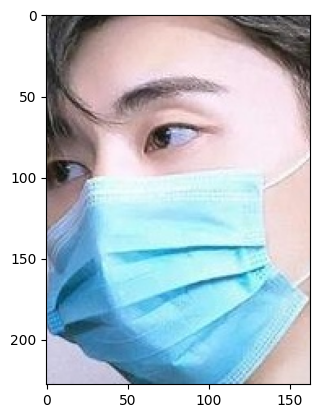

In [14]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

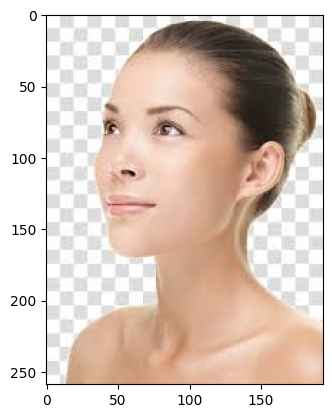

In [15]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [16]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [17]:
type(data)

list

In [18]:
len(data)

7553

array([[[186, 181, 178],
        [186, 181, 178],
        [186, 181, 178],
        ...,
        [195, 198, 203],
        [196, 199, 204],
        [196, 199, 204]],

       [[186, 181, 178],
        [186, 181, 178],
        [186, 181, 178],
        ...,
        [195, 198, 203],
        [196, 199, 204],
        [196, 199, 204]],

       [[186, 181, 178],
        [186, 181, 178],
        [186, 181, 178],
        ...,
        [195, 198, 203],
        [196, 199, 204],
        [196, 199, 204]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
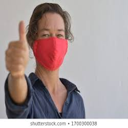

In [19]:
data[0]

In [20]:
type(data[0])

numpy.ndarray

In [21]:
data[0].shape

(128, 128, 3)

In [22]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [23]:
type(X)

numpy.ndarray

In [24]:
type(Y)

numpy.ndarray

In [25]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [26]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [28]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [29]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[222, 181, 117],
        [221, 180, 116],
        [214, 172, 113],
        ...,
        [104,  60,  24],
        [105,  58,  25],
        [104,  58,  24]],

       [[225, 184, 120],
        [222, 180, 118],
        [213, 171, 113],
        ...,
        [105,  59,  24],
        [102,  56,  23],
        [101,  54,  20]],

       [[226, 181, 121],
        [223, 177, 118],
        [210, 166, 110],
        ...,
        [111,  64,  28],
        [109,  62,  25],
        [108,  60,  24]],

       ...,

       [[ 62,  38,  10],
        [ 61,  37,  10],
        [ 61,  36,  12],
        ...,
        [ 46,  23,   9],
        [ 45,  22,   8],
        [ 45,  22,   8]],

       [[ 56,  31,   3],
        [ 55,  30,   3],
        [ 54,  29,   4],
        ...,
        [ 44,  21,   7],
        [ 44,  21,   7],
        [ 44,  21,   7]],

       [[ 54,  33,   6],
        [ 54,  31,   5],
        [ 54,  29,   4],
        ...,
        [ 43,  20,   6],
        [ 43,  20,   6],
        [ 44,  21,   7]]], dtype=uint8)
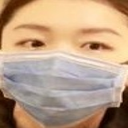

In [30]:
X_train[0]

In [31]:
X_train_scaled[0]

array([[[0.87058824, 0.70980392, 0.45882353],
        [0.86666667, 0.70588235, 0.45490196],
        [0.83921569, 0.6745098 , 0.44313725],
        ...,
        [0.40784314, 0.23529412, 0.09411765],
        [0.41176471, 0.22745098, 0.09803922],
        [0.40784314, 0.22745098, 0.09411765]],

       [[0.88235294, 0.72156863, 0.47058824],
        [0.87058824, 0.70588235, 0.4627451 ],
        [0.83529412, 0.67058824, 0.44313725],
        ...,
        [0.41176471, 0.23137255, 0.09411765],
        [0.4       , 0.21960784, 0.09019608],
        [0.39607843, 0.21176471, 0.07843137]],

       [[0.88627451, 0.70980392, 0.4745098 ],
        [0.8745098 , 0.69411765, 0.4627451 ],
        [0.82352941, 0.65098039, 0.43137255],
        ...,
        [0.43529412, 0.25098039, 0.10980392],
        [0.42745098, 0.24313725, 0.09803922],
        [0.42352941, 0.23529412, 0.09411765]],

       ...,

       [[0.24313725, 0.14901961, 0.03921569],
        [0.23921569, 0.14509804, 0.03921569],
        [0.23921569, 0

**Building a Convolutional Neural Networks (CNN)**

In [32]:
import tensorflow as tf
from tensorflow import keras

In [33]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [34]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [35]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 12s 24ms/step - loss: 0.4723 - acc: 0.7922 - val_loss: 0.3210 - val_acc: 0.8430
Epoch 2/5
170/170 [==============================] - 3s 20ms/step - loss: 0.3062 - acc: 0.8740 - val_loss: 0.2486 - val_acc: 0.8909
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2593 - acc: 0.8983 - val_loss: 0.2375 - val_acc: 0.8926
Epoch 4/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2139 - acc: 0.9104 - val_loss: 0.2122 - val_acc: 0.9091
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1819 - acc: 0.9285 - val_loss: 0.2259 - val_acc: 0.9107


**Model Evaluation**

In [36]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2077 - acc: 0.9133
Test Accuracy = 0.9133024215698242


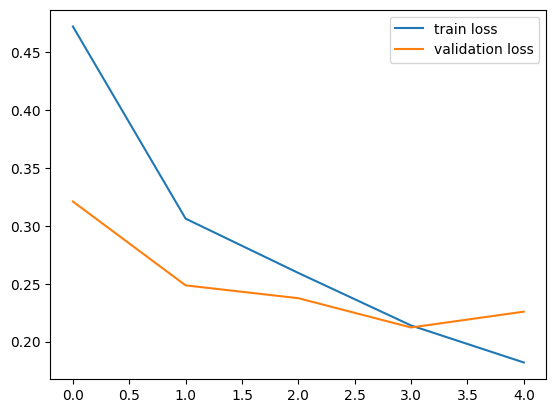

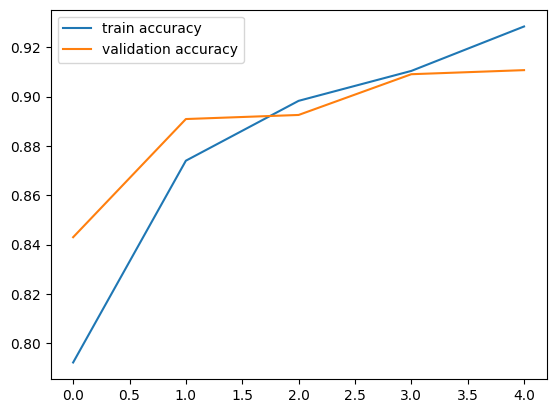

In [37]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/person without mask.jpg


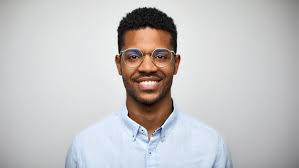

1/1 [==============================] - 0s 19ms/step
[[0.43057004 0.811778  ]]
1
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/person without mask.jpg


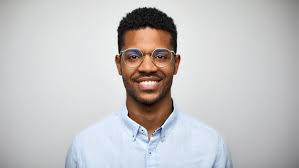

1/1 [==============================] - 0s 20ms/step
[[0.43057004 0.811778  ]]
1
The person in the image is wearing a mask


In [41]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')